In [ ]:
!pip install quandl

In [ ]:
import pandas as pd
import quandl as qdl
from scipy.stats import linregress

qdl.ApiConfig.api_key = "Sorry, this is a private key"
data = qdl.get("WIKI/AAPL", start_date="2007-01-01", end_date="2017-05-01")


**TREND LINE**

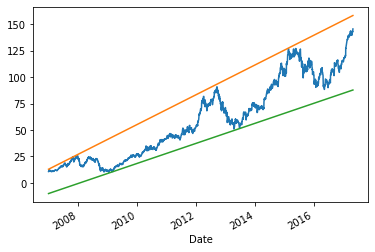

In [ ]:
def trend(data):
  data0 = data.copy()
  data0['date_id'] = ((data0.index.date - data0.index.date.min())).astype('timedelta64[D]')
  data0['date_id'] = data0['date_id'].dt.days + 1

  # high trend line

  data1 = data0.copy()

  while len(data1)>3:

      reg = linregress(
                      x=data1['date_id'],
                      y=data1['Adj. High'],
                      )
      data1 = data1.loc[data1['Adj. High'] > reg[0] * data1['date_id'] + reg[1]]

  reg = linregress(
                      x=data1['date_id'],
                      y=data1['Adj. High'],
                      )

  data0['high_trend'] = reg[0] * data0['date_id'] + reg[1]

  # low trend line

  data1 = data0.copy()

  while len(data1)>3:

      reg = linregress(
                      x=data1['date_id'],
                      y=data1['Adj. Low'],
                      )
      data1 = data1.loc[data1['Adj. Low'] < reg[0] * data1['date_id'] + reg[1]]

  reg = linregress(
                      x=data1['date_id'],
                      y=data1['Adj. Low'],
                      )

  data0['low_trend'] = reg[0] * data0['date_id'] + reg[1]
  return data0

# plot
data0 = trend(data)
data0['Adj. Close'].plot()
data0['high_trend'].plot()
data0['low_trend'].plot()

**MOVING AVERAGES/MACD** 

In [ ]:
def MA(data0, n):
  data0[f"MA{n}"] = data0["Adj. Close"].rolling(n).mean()
  return data0

In [ ]:
data0 = MA(data0,10)
data0 = MA(data0,100)
data0 = MA(data0,1000)

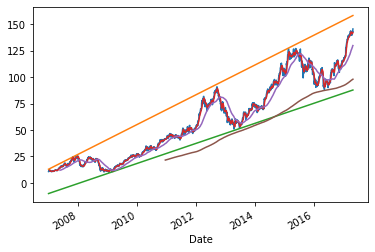

In [ ]:
data0['Adj. Close'].plot()
data0['high_trend'].plot() 
data0['low_trend'].plot()
# data0['MA10'].plot()
data0['MA100'].plot()
data0['MA1000'].plot()

RSI


In [ ]:
def RSI14(data0):
  Hist_data = data0
  while c < len(Hist_data):
        if Hist_data.iloc[c,4] > float(2.00):  # Check that the closing price for this day is greater than $2.00
            prices.append(Hist_data.iloc[c,4])
        c += 1
    # prices_df = pd.DataFrame(prices)  # Make a dataframe from the prices list
    i = 0
    upPrices=[]
    downPrices=[]
    #  Loop to hold up and down price movements
    while i < len(prices):
        if i == 0:
            upPrices.append(0)
            downPrices.append(0)
        else:
            if (prices[i]-prices[i-1])>0:
                upPrices.append(prices[i]-prices[i-1])
                downPrices.append(0)
            else:
                downPrices.append(prices[i]-prices[i-1])
                upPrices.append(0)
        i += 1
    x = 0
    avg_gain = []
    avg_loss = []
    #  Loop to calculate the average gain and loss
    while x < len(upPrices):
        if x <15:
            avg_gain.append(0)
            avg_loss.append(0)
        else:
            sumGain = 0
            sumLoss = 0
            y = x-14
            while y<=x:
                sumGain += upPrices[y]
                sumLoss += downPrices[y]
                y += 1
            avg_gain.append(sumGain/14)
            avg_loss.append(abs(sumLoss/14))
        x += 1
    p = 0
    RS = []
    RSI = []
    #  Loop to calculate RSI and RS
    while p < len(prices):
        if p <15:
            RS.append(0)
            RSI.append(0)
        else:
            RSvalue = (avg_gain[p]/avg_loss[p])
            RS.append(RSvalue)
            RSI.append(100 - (100/(1+RSvalue)))
        p+=1
    #  Creates the csv for each stock's RSI and price movements
    df_dict = {
        'Prices' : prices,
        'upPrices' : upPrices,
        'downPrices' : downPrices,
        'AvgGain' : avg_gain,
        'AvgLoss' : avg_loss,
        'RS' : RS,
        'RSI' : RSI
    }
    return df_dict
